BBCの文章をpretained-bertに入力して、[CLF]のところの特徴量を抽出してデータフレームにするという前処理をするファイル

In [1]:
import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import joblib

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_formats = {'png', 'retina'}

from tqdm import trange

In [2]:
df=pd.read_csv('data/bbc-text.csv')
df.shape
df.head()

(2225, 2)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


### ラベル情報の統計

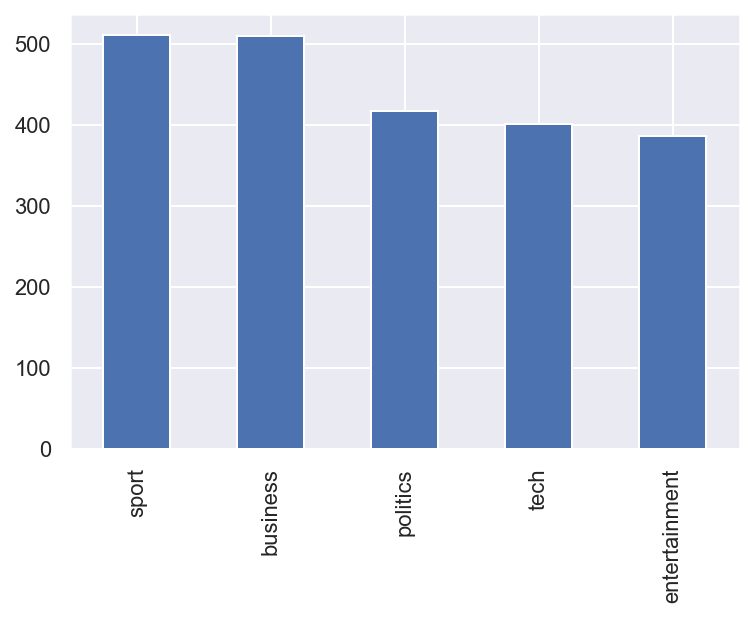

In [3]:
df['category'].value_counts().plot.bar()

### テキストの書き出し

In [4]:
centences=df['text']
centences[0]
#見ての通り一文にはなっていない

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

### pretrain-bertを特徴抽出器として用いる

### classificationのためのデータセットの作成

In [5]:
def extract_clf_features(cell):
    return pd.Series(cell[0]['layers'][0]['values'])

In [8]:
def features_json_loader():
    dfs=[]
    for i in trange(0,len(centences),50):
        df_tmp=pd.read_json('./data/bbc_features_{}.json'.format(i) ,lines=True)
        s_tmp=df_tmp.loc[:,'features']
        df_tmp=pd.DataFrame(s_tmp.apply(extract_clf_features))
        df_tmp.index=range(i,i+len(s_tmp))
        dfs.append(df_tmp)
    return pd.concat(dfs)

In [9]:
feature_df=features_json_loader()

100%|██████████| 45/45 [00:30<00:00,  1.74it/s]


In [13]:
feature_df.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.273399,-0.080405,0.525637,-0.069822,-0.065952,-0.362005,-0.252148,0.907441,-0.175653,-0.556349,...,0.202796,-0.342327,0.156985,-0.538675,0.222728,0.366792,-0.314745,-0.492801,0.488872,0.257185
1,-0.225062,0.230627,-0.014016,-0.351334,0.583346,0.130343,-0.205661,0.058135,-0.066915,0.191623,...,0.493448,-0.531517,0.002541,-0.579783,-0.195158,0.285872,-0.190588,0.293731,0.692671,0.257362
2,-0.223140,-0.182229,0.198964,-0.587038,0.116019,-0.355480,0.262283,0.356748,-0.127987,-0.393936,...,0.822272,0.017393,0.444674,-0.586118,-0.224009,0.283355,0.007049,0.238280,0.607918,0.583781
3,-1.227587,-0.311005,0.324756,-0.160096,0.181778,-0.603752,-0.114064,0.098340,-0.080799,-0.143739,...,0.627725,-0.105906,0.331748,-0.793930,0.545979,0.334995,-0.424954,-0.544916,0.642600,0.270558
4,-0.120004,-0.082054,0.300280,-0.222195,-0.244158,-0.212468,-0.102699,0.087957,-0.012975,0.055390,...,0.196845,-0.051777,0.364250,-0.179219,0.360928,0.586258,-0.214748,-0.392782,0.688578,0.205861


In [15]:
feature_df['category']=df['category']
feature_df.head()

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,category
0,-0.273399,-0.080405,0.525637,-0.069822,-0.065952,-0.362005,-0.252148,0.907441,-0.175653,-0.556349,...,-0.342327,0.156985,-0.538675,0.222728,0.366792,-0.314745,-0.492801,0.488872,0.257185,tech
1,-0.225062,0.230627,-0.014016,-0.351334,0.583346,0.130343,-0.205661,0.058135,-0.066915,0.191623,...,-0.531517,0.002541,-0.579783,-0.195158,0.285872,-0.190588,0.293731,0.692671,0.257362,business
2,-0.223140,-0.182229,0.198964,-0.587038,0.116019,-0.355480,0.262283,0.356748,-0.127987,-0.393936,...,0.017393,0.444674,-0.586118,-0.224009,0.283355,0.007049,0.238280,0.607918,0.583781,sport
3,-1.227587,-0.311005,0.324756,-0.160096,0.181778,-0.603752,-0.114064,0.098340,-0.080799,-0.143739,...,-0.105906,0.331748,-0.793930,0.545979,0.334995,-0.424954,-0.544916,0.642600,0.270558,sport
4,-0.120004,-0.082054,0.300280,-0.222195,-0.244158,-0.212468,-0.102699,0.087957,-0.012975,0.055390,...,-0.051777,0.364250,-0.179219,0.360928,0.586258,-0.214748,-0.392782,0.688578,0.205861,entertainment


In [16]:
#保存
# feature_df.to_csv('./data/feature_dataframe.csv')